<a href="https://colab.research.google.com/github/jasmineA20/Hydrogen/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
import scipy.special as sps
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

For calculating the hydrogen atom orbitals, the two special functions in scipy eval_genlaguerre (for evaluating the associated laguerre polynomials), sph_harm (to generate the spherical harmonics for given l,m,θ,Φ). 



In [ ]:
def h_orbital(r,theta,phi,n,l,m):
    #odd thing: θ is the azimuthal angle in scipy sph_harm documentation
    #so, theta->[0,2*pi] , phi-> [0,pi]
    f = ( (2./n)**3. * sps.factorial(n-l-1) / (2. * n * sps.factorial(n+l)) )**0.5
    return f * np.exp(-r/2.) *r**l * sps.sph_harm(m,l,theta,phi) * sps.eval_genlaguerre(n-l-1,2*l+1,r)

In [ ]:
r = np.linspace(0,10,101) #creating an array of 101 points evenly spaced from 0 to 10 (inclusive)
t = np.linspace(0,np.pi,101)
p = np.linspace(0,2.*np.pi,101)

rp, th, ph = np.meshgrid(r,t,p,indexing='ij',sparse=True)

Now starting with 1D visualization of the orbitals. 1s,2s and 2p orbitals 

In [ ]:
psi_1s = h_orbital(rp,th,ph,1,0,0)
psi_2s = h_orbital(rp,th,ph,2,0,0)
psi_2p0 = h_orbital(rp,th,ph,2,1,0)
psi_2p1 = h_orbital(rp,th,ph,2,1,1)
psi_3s = h_orbital(rp,th,ph,3,0,0) 
psi_4s = h_orbital(rp,th,ph,4,0,0)

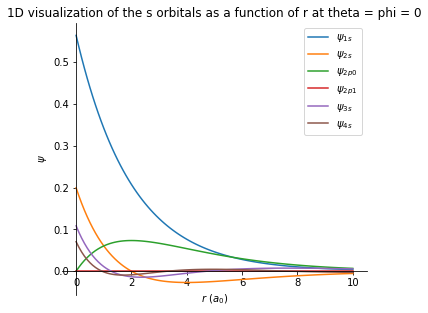

In [ ]:
fig1 = plt.figure(figsize=(12,5))
#Creating a new Axis will delete any pre-existing Axes that overlap beyond the shared boundary w
#which would not be convenient so using pyplot.axes 
ax1 = fig1.add_subplot(121,frameon = True)
#plotting r w.r.t. the real part of the orbital value obtained from h_orbital
ax1.plot(rp[:,0,0],np.real(psi_1s[:,0,0]),label='$\psi_{1s}$')
ax1.plot(rp[:,0,0],np.real(psi_2s[:,0,0]),label='$\psi_{2s}$')
ax1.plot(rp[:,0,0],np.real(psi_2p0[:,0,0]),label='$\psi_{2p0}$')
ax1.plot(rp[:,0,0],np.real(psi_2p1[:,0,0]),label='$\psi_{2p1}$')
ax1.plot(rp[:,0,0],np.real(psi_3s[:,0,0]),label='$\psi_{3s}$')
ax1.plot(rp[:,0,0],np.real(psi_4s[:,0,0]),label='$\psi_{4s}$')
ax1.set_xlabel('$r$ ($a_0$)')
ax1.set_ylabel('$\psi$')

ax1.spines['left'].set_position('zero')
ax1.spines['right'].set_color('none')
ax1.spines['bottom'].set_position('zero')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.title('The first few raidal wavefunctions of Hydrogen')
ax1.legend()

2D visualization. One plot shows the magnitude of the complex number z and the other one shows rhe phase. Polar plot is used for easier visualization since angular data is being plotted. 

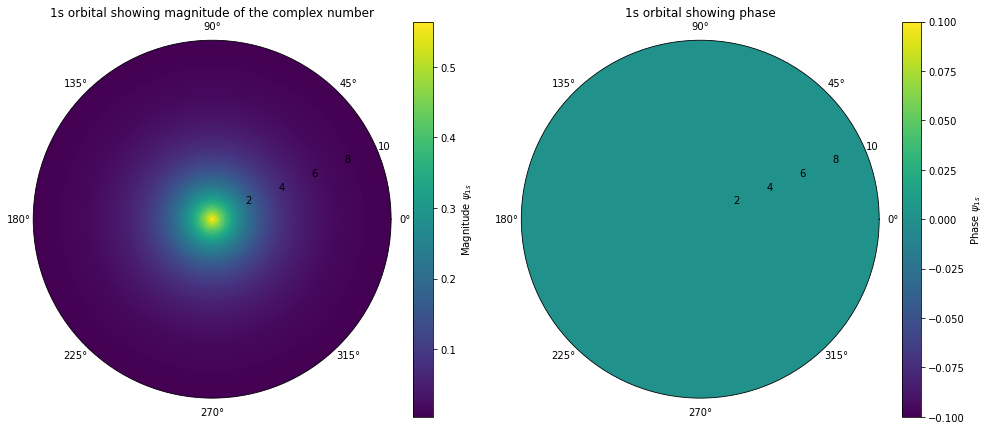

In [ ]:
fig2 = plt.figure(figsize=(14,6))
ax2 = fig2.add_subplot(1,2,1,projection='polar')
mesh = ax2.pcolormesh(ph[0,0,:],rp[:,0,0],np.absolute(psi_1s[:,0,:]),shading='auto')
cbar = fig2.colorbar(mesh) # Adding a colorbar
cbar.set_label("Magnitude $\psi_{1s}$")
plt.title('1s orbital showing magnitude of the complex number')

ax3 = fig2.add_subplot(1,2,2,projection='polar')
mesh2 = ax3.pcolormesh(ph[0,0,:],rp[:,0,0],np.angle(psi_1s[:,0,:]),shading='auto')
cbar2 = fig2.colorbar(mesh2,ax=ax3)# Adding a colorbar
cbar2.set_label("Phase $\psi_{1s}$")
plt.title('1s orbital showing phase')

fig2.tight_layout()

2D visualization for the 2p shell. Plotting phi as a function of z. 



In [ ]:
ax4.cla() #Clearing the axis object 

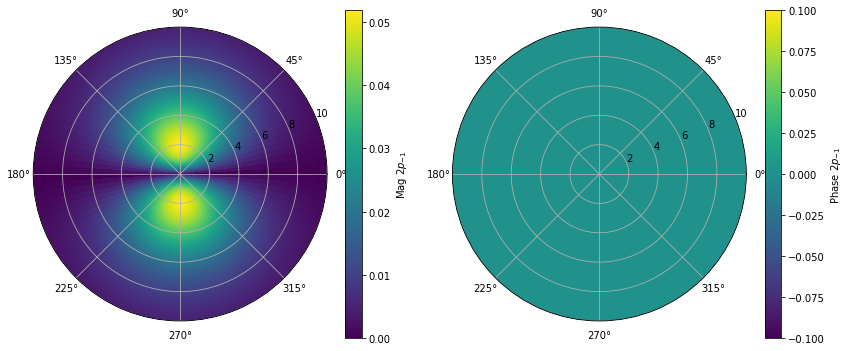

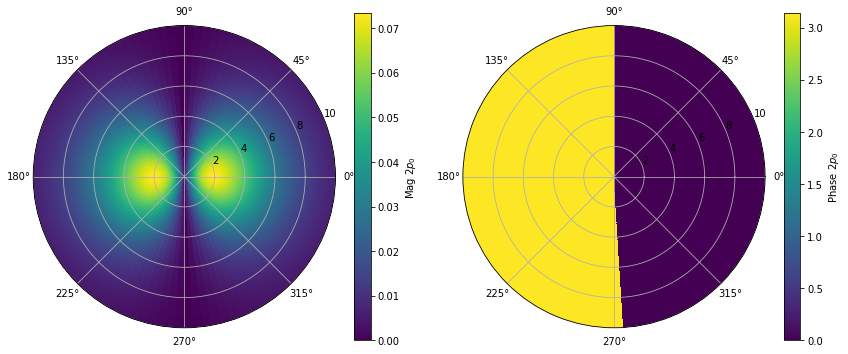

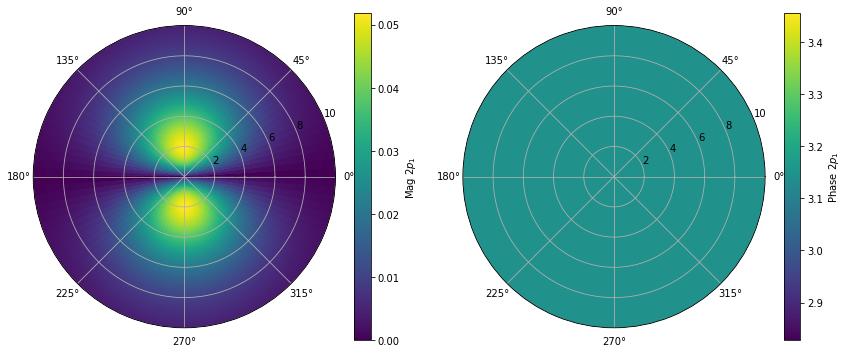

In [ ]:
r = np.linspace(0,10.,1000,endpoint=False)
t = np.linspace(0,np.pi,100,endpoint=True)

r3, th3, ph3 = np.meshgrid(r,t,p,indexing='ij',sparse=True)
p = np.linspace(0,2*np.pi,100,endpoint=False)

def r_phi_plot(r,phi,psi,label):
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(1,2,1,projection='polar')

    mesh = ax.pcolormesh(phi,r,np.absolute(psi),shading='auto')
    cbar = fig.colorbar(mesh) 
    cbar.set_label("Mag "+label)
    ax.grid()

    ax2 = fig.add_subplot(1,2,2,projection='polar')
    mesh2 = ax2.pcolormesh(phi,r,np.angle(psi),shading='auto')
    cbar2 = fig3.colorbar(mesh2,ax=ax2)
    cbar2.set_label("Phase "+label)
    ax2.grid()
    
    fig.tight_layout()
    return fig

r_plot = np.linspace(0,10.,1001,endpoint=True)
p_plot = np.linspace(0,2*np.pi,101,endpoint=True)

rp_plot, th_plot, ph_plot = np.meshgrid(r_plot,t,p_plot,indexing='ij',sparse=True)

#This is the first trial specific to the 2p orbital since the m_l goes from -(l-1) to (l-1)
#The general case is implemented right after this 
p_orb_figs = []
for m in [-1,0,1]:
    psi = h_orbital(r3,th3,ph3,2,1,m) 
    label = f"$2p_{{{m}}}$"
    p_orb_figs.append(r_phi_plot(rp_plot[:,0,0],ph_plot[0,0,:],psi[:,0,:],label))

Enter quantum number l 3


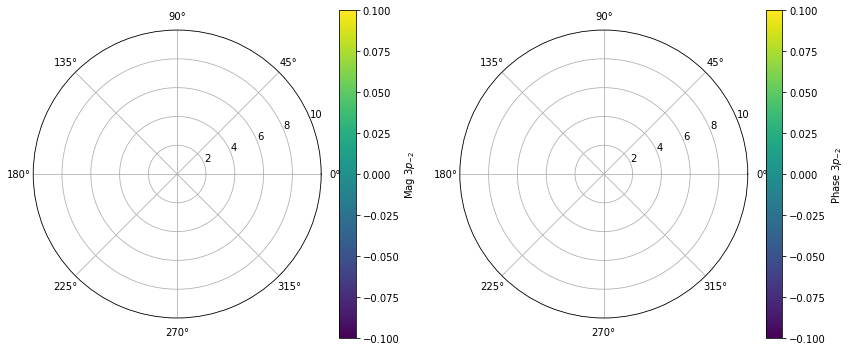

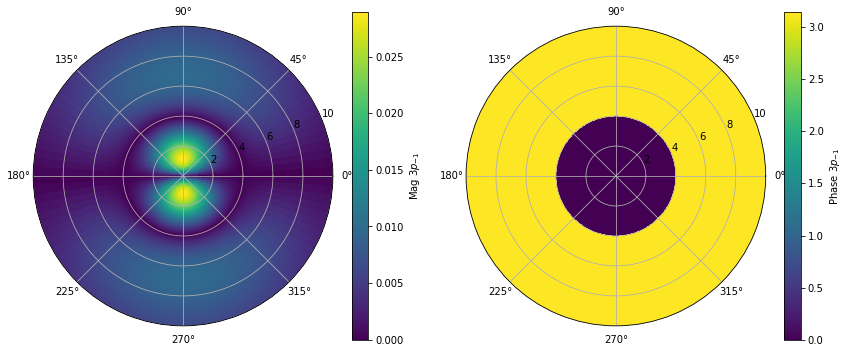

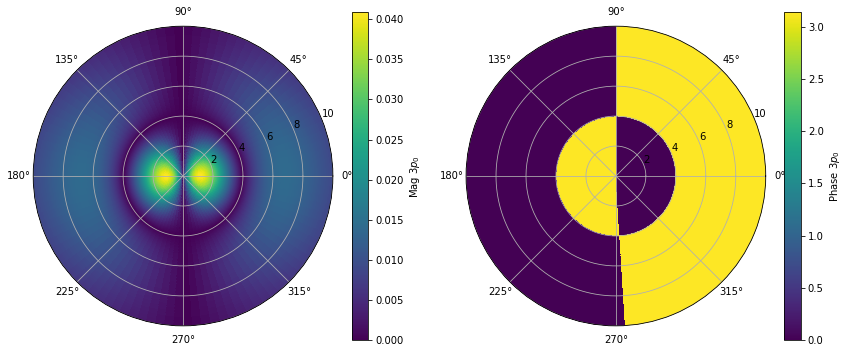

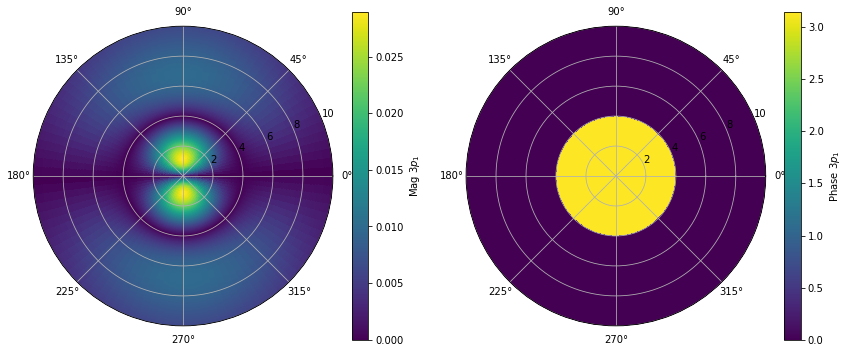

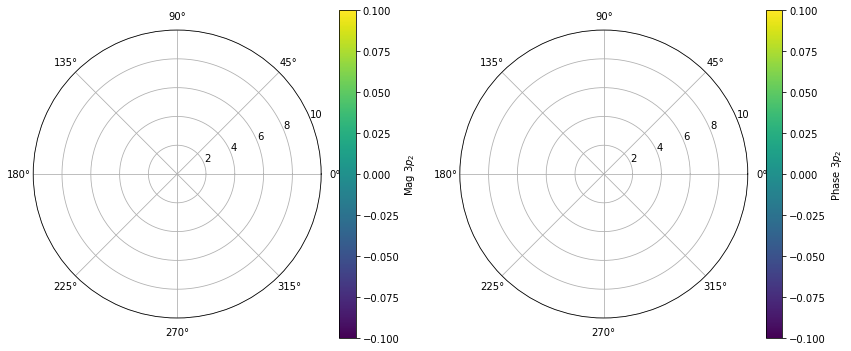

In [ ]:
r = np.linspace(0,10.,1000,endpoint=False)
t = np.linspace(0,np.pi,100,endpoint=True)
r4, th4, ph4 = np.meshgrid(r,t,p,indexing='ij',sparse=True)
p = np.linspace(0,2*np.pi,100,endpoint=False)
#General case of the above 2D implementation for the 2p orbital 
def Gen_r_phi_plot(r,phi,psi,label):
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(1,2,1,projection='polar')

    mesh = ax.pcolormesh(phi,r,np.absolute(psi),shading='auto')
    cbar = fig.colorbar(mesh) 
    cbar.set_label("Mag "+label)
    ax.grid()

    ax2 = fig.add_subplot(1,2,2,projection='polar')
    mesh2 = ax2.pcolormesh(phi,r,np.angle(psi),shading='auto')
    cbar2 = fig3.colorbar(mesh2,ax=ax2)
    cbar2.set_label("Phase "+label)
    ax2.grid()
    
    fig.tight_layout()
    return fig

r_plot = np.linspace(0,10.,1001,endpoint=True)
p_plot = np.linspace(0,2*np.pi,101,endpoint=True)

rp_plot, th_plot, ph_plot = np.meshgrid(r_plot,t,p_plot,indexing='ij',sparse=True)

l = int(input('Enter quantum number l '))
p_orb_figs = []
a = l-1
for m in range(-a,a+1):
    psi = h_orbital(r4,th4,ph4,l,1,m) 
    label = f"${l}p_{{{m}}}$"
    p_orb_figs.append(Gen_r_phi_plot(rp_plot[:,0,0],ph_plot[0,0,:],psi[:,0,:],label))

Finally, 3D Visualization 

In [ ]:
xyz = np.linspace(-10,10,51)
x,y,z = np.meshgrid(xyz,xyz,xyz,sparse=True)